129


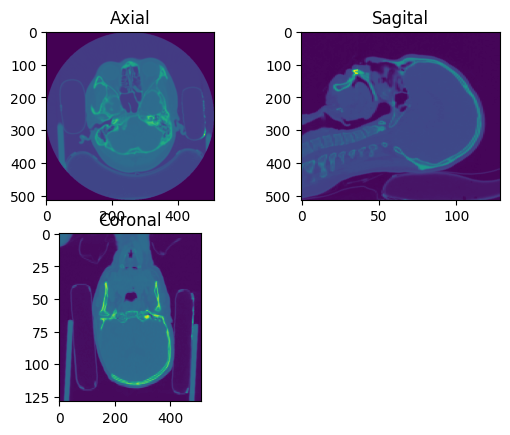

[[-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 ...
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]
 [-2000 -2000 -2000 ... -2000 -2000 -2000]] (512, 512) int16
[[[-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  ...
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]]

 [[-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  ...
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]]

 [[-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [-2000. -2000. -2000. ... -2000. -2000. -2000.]
  [

In [9]:
import pydicom as dicom
import numpy as np
import matplotlib.pyplot as plt
import os

path="../data/HopSo/2/dicom_HA THE HANH_22102041_129/"
ct_images=os.listdir(path)
ct_images = [s for s in ct_images if '.dcm' in s]
print(len(ct_images))

slices = [dicom.read_file(path+'/'+s,force=True) for s in ct_images]
#print(slices)
slices = sorted(slices,key=lambda x:x.ImagePositionPatient[2])

pixel_spacing = slices[0].PixelSpacing
slices_thickess = slices[0].SliceThickness

axial_aspect_ratio = pixel_spacing[1]/pixel_spacing[0]
sagital_aspect_ratio = pixel_spacing[1]/slices_thickess
coronal_aspect_ratio = slices_thickess/pixel_spacing[0]

#print("Pixel spacing is:",pixel_spacing)
#print("Slices Thickness is:",slices_thickess)

#print("Axial Aspect Ratio:",axial_aspect_ratio)
#print("Sagital Aspect Ratio:",sagital_aspect_ratio)
#print("Coronal Aspect Ratio:",coronal_aspect_ratio)

img_shape = list(slices[0].pixel_array.shape)
img_shape.append(len(slices))
volume3d=np.zeros(img_shape)

for i,s in enumerate(slices):
    array2D=s.pixel_array
    volume3d[:,:,i]= array2D

axial=plt.subplot(2,2,1)
plt.title("Axial")
plt.imshow(volume3d[:,:,img_shape[2]//2])
axial.set_aspect(axial_aspect_ratio)

sagital=plt.subplot(2,2,2)
plt.title("Sagital")
plt.imshow(volume3d[:,img_shape[1]//2,:])
sagital.set_aspect(sagital_aspect_ratio)

coronal = plt.subplot(2,2,3)
plt.title("Coronal")
plt.imshow(volume3d[img_shape[0]//2,:,:].T)
coronal.set_aspect(coronal_aspect_ratio)

plt.show()

print(array2D, array2D.shape, array2D.dtype)
print(volume3d, volume3d.shape, volume3d.dtype)    


In [10]:
import nibabel as nib

ni_img = nib.Nifti1Image(volume3d, affine=np.eye(4))
nib.save(ni_img, "dicom_volume_image.nii")